In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 16.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Preliminary Study


train.csv shape is  (139753, 9)
test.csv shape is  (13976, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0  1049849  B000MR9D5E  A1EKSETIBS9ETQ                     0   
1   999834  B000GAKFIG   AR0HFYHYHDGQQ                     2   
2   218826  6300215776  A37S3ACL57LN62                    11   
3   796384  B00019071C  A1TO1P3NV7OAU6                     2   
4  1219784  B001NFNFN0   ATCM1W7HWIC6U                     0   

   HelpfulnessDenominator        Time  \
0                       0  1198281600   
1                       5  1245024000   
2                      15  1126137600   
3                       2  1351036800   
4                       0  1381708800   

                                             Summary  \
0  Great nature series, but not all scenes looked...   
1                 Agatha Christie's Marple: Series 2   
2                             Childish Entertainment   
3                       The weakest Babylon 5 season   
4                        

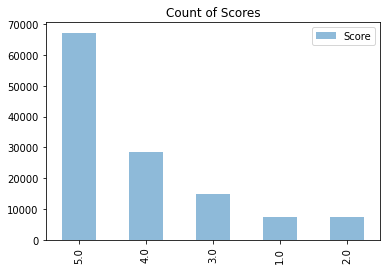

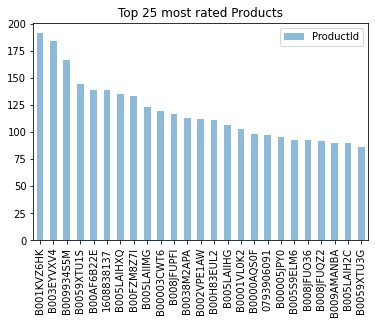

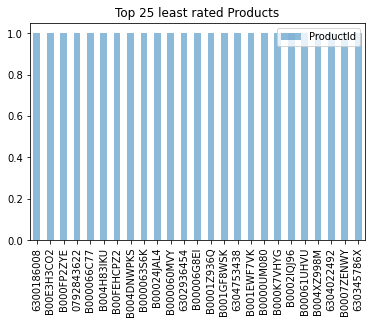

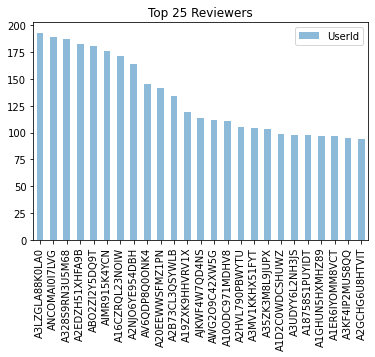

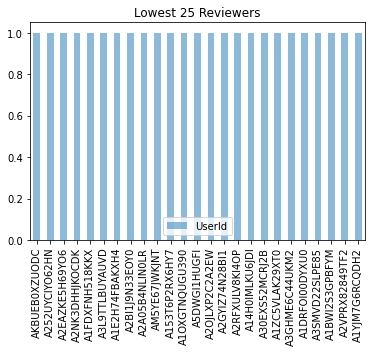

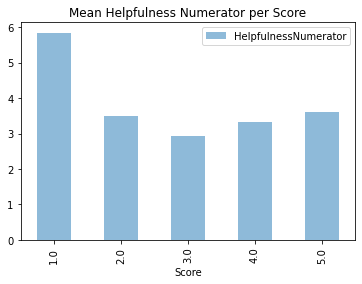

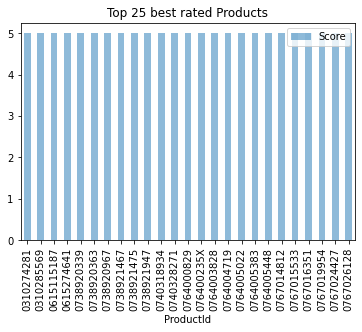

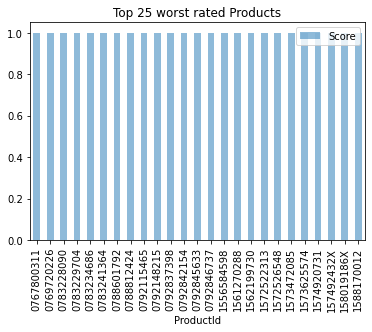

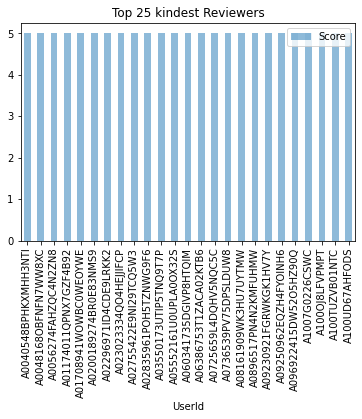

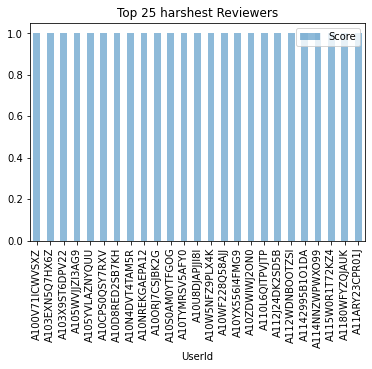

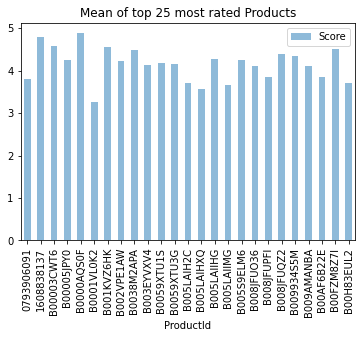

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

trainingSet = pd.read_csv("train.csv")
testingSet = pd.read_csv("test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

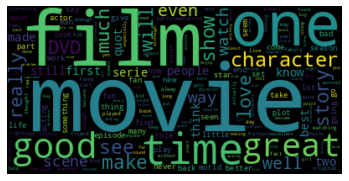

In [47]:
from wordcloud import WordCloud
trainingSet = pd.read_csv("train.csv")

wordcloud = WordCloud().generate(text = ';'.join(list(trainingSet.sample(5000).Text.astype(str).values)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)

    return df

# Load the dataset
trainingSet = pd.read_csv("train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("X_test.csv", index=False)
trainX.to_csv("X_train.csv", index=False)

Accuracy on testing set =  0.5176975671807919
RMSE on testing set =  2.1074574654158056


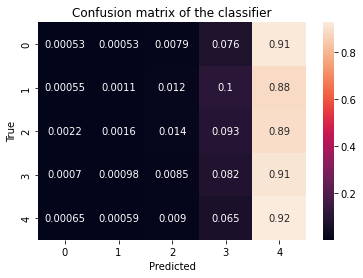

In [4]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# Load training set with new features into DataFrame
X_train = pd.read_csv("X_train.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])

# Learn the model
model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)

# pickle model - saves it so you can load it later
with open('knn_20_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Data Processing

In [ ]:
############################################
# seperate testing data from training data #
############################################

# Load the dataset
trainSet = pd.read_csv("train.csv")
print(trainSet.shape)

# Load test set
submissionSet = pd.read_csv("test.csv",header=0)
print(submissionSet.shape)

# remove the testing data from training set 

ids= [id for id in submissionSet["Id"]]
for id in ids:
    index = trainSet[ (trainSet['Id'] == id) ].index
    # print(index)
    trainSet.drop(index, inplace=True)
trainSet.to_csv("pure_train.csv", index=False)

# add to the testing set
testSet = pd.DataFrame(trainSet.iloc[125777:])
testSet.to_csv("pure_test.csv", index=False)


print(f"pure_train shape: {trainingSet.shape}")
print(f"pure_test shape: {testingSet.shape}")



In [ ]:
# check the new training dataset
trainingSet = pd.read_csv("train.csv")
testingSet = pd.read_csv("test.csv")
trainingSet.shape
# use the new dataset to plot the heat map 
num_features = trainingSet.describe().columns.tolist()
print(trainingSet.describe())
plt.figure(figsize=(12,8))
sns.heatmap(trainingSet[num_features].corr(), annot=True)
plt.title("Correlation Heatmap between continuous variables")
trainingSet.head(10)

## methods for Count & Tfidf transform

In [4]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
#clean the text
# https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string
# https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
def remove_char(x: str):
    special = '[^A-Za-z ]+'
    x = re.sub(special,'',x)
    x = x.strip()
    x = x.lower()
    return x


def clean_dataframe(df: pd.DataFrame ,col: str,drop_col:list):
    # combine Text and Summary cols and fill in empty Text cols with ""
    df[['Text']] = df[['Text']].fillna('')
    df[['Summary']] = df[['Summary']].fillna('')
    df['Text'] = df['Text'] + ' ' + df['Summary']
    # clean stop words using remove_char
    stop_words = set(stopwords.words('english'))
    df[col].apply(lambda row: remove_char(str(row))).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    # drop cols 
    df = df.drop(columns = drop_col)
#     print(df.head)
#     print(df.shape)
    print("\n clean up done \n")
    return df


def cv(texts:list[str], min_df:int, max_df:float):
    # Initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    
    # only use words showing up in more than 2 doc and less than 90% of the docs
    
    #instantiate CountVectorizer() 
    countVect = CountVectorizer(lowercase=True,
                        ngram_range = (1,1), 
                        tokenizer = tokenizer.tokenize, 
                        min_df=min_df,
                        max_df=max_df) 
    # this steps generates word counts for the words in your docs 
    word_count_vector = countVect.fit_transform(texts)
    print(len(countVect.stop_words_))
    print(len(countVect.vocabulary_ ))
    print("word_count_vector shape",word_count_vector.shape)
    return countVect,  word_count_vector
    

    
def tfidf_transform(word_count_vector, TfidfTrans = None):
    if TfidfTrans is None:
        # Vectorize document using TF-IDF
        
        TfidfTrans_vectors = TfidfTrans.fit_transform(word_count_vector)
    else:
        TfidfTrans_vectors = TfidfTrans.transform(word_count_vector)

    # # Fit and Transform the documents
    # tfidf_vectors = tfidf.fit_transform(texts)

    # first_vector_tfidfvectorizer=tfidf_vectors[0] 

    # first_vector_tfidfvectorizer_df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.vocabulary_.keys(), columns=["tfidf"])
    # first_vector_tfidfvectorizer_df.sort_values(by=["tfidf"],ascending=False)
    return TfidfTrans, TfidfTrans_vectors


def svd(df: pd.DataFrame, numComponents: int):
    # perform svd on tfidfTransformed data
    TfidfVec = TfidfVectorizer(lowercase=True,
                ngram_range = (1,1), 
                tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                min_df = 10, max_df = 0.9)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    
    lsa = TruncatedSVD(n_components=numComponents, n_iter= 10)
    lsaFit = lsa.fit_transform(TfidfTrans_vectors)
    e = lsa.explained_variance_ratio_.sum()
    # explained.append(e)
    print("Number of components = %r and explained variance = %r"%(numComponents,e))
    return lsa, lsaFit

def processTrain(df: pd.DataFrame):
    # clean texts 
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['Id', 'ProductId', 'UserId', 'Summary', 'Time']) 
    countVect,  word_count_vector = cv(texts = df["Text"], min_df = 10, max_df = 0.9)

    # update dataframe
    word_count_vecs = pd.DataFrame(word_count_vector.toarray())
    word_count_vecs.columns = word_count_vecs.columns.astype(str)
    
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (1,1), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 10, max_df = 0.9)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    tfidf_vectors = pd.DataFrame(TfidfTrans_vectors.toarray())
    tfidf_vectors.columns = tfidf_vectors.columns.astype(str)
    
    print("word_count_vecs", word_count_vecs.shape)
    print("train_tfidf_vectors.shape ", tfidf_vectors.shape)
    print("train df shape ", df.shape)
#     df = pd.concat([df, tfidf_vectors],axis=1)
#     print(df.head)
    return df, TfidfVec, tfidf_vectors, word_count_vecs

def processTest(df: pd.DataFrame, TfidfVec):
    # clean texts 
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['Id', 'ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    tfidf_vectors = pd.DataFrame(tfidf_vectors.toarray())
    tfidf_vectors.columns = tfidf_vectors.columns.astype(str)
    
    print("tfidf_vectors.shape ", tfidf_vectors.shape)
    print("tests df shape ", df.shape)

#     df = pd.concat([df, tfidf_vectors],axis=1)
#     print(df.head)
    return df, tfidf_vectors

print("load done")
    

load done


[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/hzjh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Try Apply LSA (SVD)

In [5]:
# load data
svd_eval_set = pd.read_csv("./X_train.csv")
# TruncatedSVD
svd_eval_set = clean_dataframe(df = svd_eval_set ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
TfidfVec = TfidfVectorizer(lowercase=True,
                ngram_range = (1,1), 
                tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                min_df = 15, max_df = 0.85)
TfidfTrans_vectors = TfidfVec.fit_transform(svd_eval_set["Text"])

numComponents = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1500,2000,2500,3000,3500,5000] # list containing different values of components
explained=[]
for x in numComponents:
    lsa = TruncatedSVD(n_components=x, n_iter= 10)
    lsaFit = lsa.fit_transform(TfidfTrans_vectors)
    e = lsa.explained_variance_ratio_.sum()
    explained.append(e)
    print("Number of components = %r and explained variance = %r"%(x,e))
    ## Get Singular values and Components 
    # Sigma = lsa.singular_values_ 
    # V_transpose = lsa.components_.T
    # print(f"sigma: {Sigma}")
    # print(f"V_transpose: {V_transpose}")
    # lsaFit.shape
plt.plot(numComponents, explained)




 clean up done 

Number of components = 4 and explained variance = 0.031420664622774444
Number of components = 10 and explained variance = 0.05370852479872582
Number of components = 15 and explained variance = 0.06761016955981432
Number of components = 20 and explained variance = 0.07963248813958779
Number of components = 50 and explained variance = 0.12860919508311217
Number of components = 100 and explained variance = 0.18052477493572466
Number of components = 150 and explained variance = 0.21948180955524987
Number of components = 200 and explained variance = 0.25118136412931535
Number of components = 500 and explained variance = 0.37371223336216186
Number of components = 700 and explained variance = 0.4272302996303578
Number of components = 800 and explained variance = 0.44965827892515997
Number of components = 900 and explained variance = 0.4698782300059656
Number of components = 1000 and explained variance = 0.4882923507529112
Number of components = 1500 and explained variance = 

KeyboardInterrupt: 

In [ ]:
lst = [0.031420664622774444,
0.05370852479872582,
0.06761016955981432,
0.07963248813958779,
0.12860919508311217,
0.18052477493572466,
0.21948180955524987,
0.25118136412931535,
0.37371223336216186,
0.4272302996303578,
0.44965827892515997,
0.4698782300059656,
0.4882923507529112,
 0.5618341441545273,
0.6166675743097865,
0.659656325091857,
0.6947263594231265]
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [ ]:
# after tuning min_df = 2, max_df to 0.90:
# using num components = 8000

lsa, lsaFit = svd(df=train, numComponents=8000)

plt.plot(range(len(lsa.singular_values_)), lsa.singular_values_)
plt.show()



### As we can see, we can explain 80 percent of our data using 10000 words instead of 81913 words. Thus we will only use the meaningful words to train our ml model

## Apply data process for both the training data and the testing data, for further useage 


trainingSet data process

In [2]:
# packages needed for this method:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# load datasets (the testing dataset is joined with features)
X_train = pd.read_csv("X_train.csv")
sumbissionSet = pd.read_csv("X_test.csv").drop(['Score'], axis=1)
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

# numComponents = 7000
# # cv, word_count_vector, TfidfTrans, TfidfTrans_vectors = tfidf(train,min_df=2, max_df=0.9)
# # lsaTrain, lsaFitTrain = svd(df=train, numComponents=numComponents, min_df=2, max_df=0.9)
# print(lsaFit.shape)

#remove singular values based on the graph we obtained, we keep 2500 features
# lsaFitDF = pd.DataFrame(lsaFit)
# lsaFitDF.columns = lsaFitDF.columns.astype(str)

# Adding new features to the dataframe

X_train_processed, TfidfVec, X_train_tfidf_vectors, word_count_vecs = processTrain(X_train)
print(f"X_train_processed: \n {X_train_processed.head}")

#df, tfidf_vectors
X_test_processed, X_test_Tfidf_vectors = processTest(X_test,TfidfVec)
print(f"X_test_processed: \n{X_test_processed.head}")

submission_processed, submission_Tfidf_vectors = processTest(sumbissionSet,TfidfVec)
print(f"submission_processed: \n{submission_processed.head}")

# newColNames = [f"textCol{i}" for i in range(1,numComponents+1)]
# train_processed = pd.concat([train_processed, lsaFitDF],axis=1)
print(f"X_train_processed: {X_train_processed.shape}, X_test_processed: {X_test_processed.shape}, submission_processed: {submission_processed.shape} ")
print("cell done")

# Save the datasets with the new features for easy access later
# trainX.to_csv("X_train.csv", index=False)
# testX.to_csv("X_test.csv", index=False)


<bound method NDFrame.head of         HelpfulnessNumerator  HelpfulnessDenominator  \
115330                     0                       0   
17624                      1                       2   
30519                      1                       1   
8247                     146                     151   
36131                      0                       1   
...                      ...                     ...   
45891                      5                      13   
117952                     2                       4   
42613                      2                       2   
43567                      3                       5   
68268                      0                       1   

                                                     Text  Helpfulness  \
115330  This film is well done, though not as well as ...     0.000000   
17624   My grands just loved the 3D version. The 3D ve...     0.500000   
30519   Love the series, just completed the set of sev...     1.000000   
8

tfidf_vectors.shape  (13976, 30178)
tests df shape  (13976, 5)
submission_processed: 
<bound method NDFrame.head of        HelpfulnessNumerator  HelpfulnessDenominator  \
0                         0                       1   
1                         2                       2   
2                        11                      11   
3                         0                       0   
4                         1                       2   
...                     ...                     ...   
13971                     0                       0   
13972                     7                       7   
13973                     0                       0   
13974                     6                       6   
13975                     0                       7   

                                                    Text  Helpfulness  \
0      I bought this thinking it was Sherlock Holmes ...          0.0   
1      1. Scenic design and the Directors use of it p...          1.0   
2   

testingSet data process

In [3]:
print(X_train_processed.shape)
print(X_train_tfidf_vectors.shape)
X_train_processed = pd.concat([X_train_processed.reset_index(drop=True), X_train_tfidf_vectors.reset_index(drop=True)], axis =1, ignore_index = True)
print(X_train_processed.shape)

(94332, 5)
(94332, 30178)
(94332, 30183)


In [4]:
print(X_test_processed.shape)
print(X_test_Tfidf_vectors.shape)
X_test_processed = pd.concat([X_test_processed.reset_index(drop=True), X_test_Tfidf_vectors.reset_index(drop=True)], axis =1, ignore_index = True)
print(X_test_Tfidf_vectors.shape)


(31445, 5)
(31445, 30178)
(31445, 30178)


In [5]:
print(submission_processed.shape)
print(submission_Tfidf_vectors.shape)
submission_processed = pd.concat([submission_processed.reset_index(drop=True), submission_Tfidf_vectors.reset_index(drop=True)], axis =1, ignore_index = True)
print(submission_processed.shape)

(13976, 5)
(13976, 30178)
(13976, 30183)


# Models to Try

## - Logistic Regression

use nlp to count the number of positive words in the sentence and the negative words in the sentence.

In [53]:
# raw
X_train_processed_full.head

<bound method NDFrame.head of        0      1                                                  2      \
0          0      0  This film is well done, though not as well as ...   
1          1      2  My grands just loved the 3D version. The 3D ve...   
2          1      1  Love the series, just completed the set of sev...   
3        146    151  This delightful trilogy tells the story of Eli...   
4          0      1  I had played and watched all "Resident Evil" m...   
...      ...    ...                                                ...   
94327      5     13  This is Clint Eastwood's cinematic "morality p...   
94328      2      4  Some people would say it doesn't live up to th...   
94329      2      2  Although Red River, The Searchers, and possibl...   
94330      3      5  The definitve package to every SW fan outthere...   
94331      0      1  I previously gave this remastered version one ...   

          3      4        5      6      7      8      9      ...  30173  \
0     

/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.5506121799968199
RMSE on testing set =  1.8356495468277945


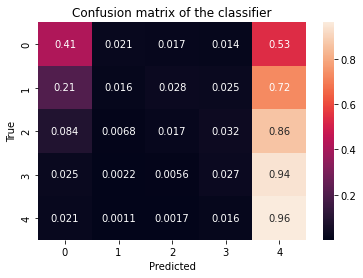

In [6]:
''' dataFrames are
X_train_processed
X_test_processed
submission_processed
'''

X_train_processed = X_train_processed.drop(columns=[2]) # dropping the test cols 
X_test_processed = X_test_processed.drop(columns=[2])
X_submission_processed = submission_processed.drop(columns=[2])
# Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)
logist = LogisticRegression(random_state=0,C=20).fit(X_train_processed, Y_train)
Y_test_predictions = logist.predict(X_test_processed)


# pickle model - saves it so you can load it later
# with open('logist_2.obj', 'wb') as f:
#         pickle.dump(logist, f)

# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = logist.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#submission

X_submission_processed['Score'] = logist.predict(X_submission_processed)


In [9]:
with open('logist_2.obj', 'wb') as f:
    pickle.dump(logist, f)
# save to submission:
X_submission_processed['Score'].to_csv("logist_2_submission.csv")

/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.5599618381300684
RMSE on testing set =  1.7553188106217206


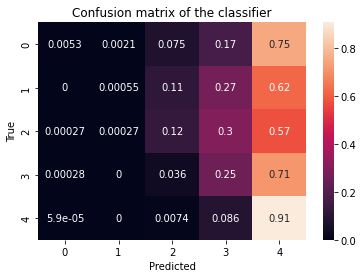

In [10]:
''' dataFrames are
X_train_processed
X_test_processed
submission_processed
'''

X_train_processed_selected = X_train_processed.drop(columns=[0,1]) # dropping the test cols 
X_test_processed_selected = X_test_processed.drop(columns=[0,1])
X_submission_processed = submission_processed.drop(columns=[0,1,2])
# Learn the model
logist = LogisticRegression(random_state=0,C=20).fit(X_train_processed_selected, Y_train)

# pickle model - saves it so you can load it later
with open('logist_3.obj', 'wb') as f:
    pickle.dump(logist, f)

# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = logist.predict(X_test_processed_selected)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#submission

X_submission_processed['Score'] = logist.predict(X_submission_processed)
X_submission_processed['Score'].to_csv("logist_3_submission.csv")

### Try another way of logistic regression, only use text and summary without anything else, and without removing the most common words and least common words 


In [26]:
def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (1,1), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 10, max_df = 0.9)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors


trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv")
# split 
training_drop = trainingSet.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

TfidfVec, TfidfTrans_vectors_train = processTrain_raw(X_train)
TfidfTrans_vectors_test = processTest_raw(X_test,TfidfVec)
print(TfidfTrans_vectors_train.shape)
print(TfidfTrans_vectors_test.shape)

logis = LogisticRegression(random_state=0,C=80).fit(TfidfTrans_vectors_train,Y_train)
logis_response = logis.predict(TfidfTrans_vectors_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, logis_response))
print("RMSE on testing set = ", mean_squared_error(Y_test, logis_response))


 clean up done 


 clean up done 

(94331, 30144)
(31444, 30144)
RMSE on testing set =  0.8451532883857016


/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (1,1), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 15, max_df = 0.85)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors


trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv").drop(['Score'], axis=1)
# split 
training_drop = trainingSet.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

TfidfVec, TfidfTrans_vectors_train = processTrain_raw(X_train)
TfidfTrans_vectors_test = processTest_raw(X_test,TfidfVec)
print(TfidfTrans_vectors_train.shape)
print(TfidfTrans_vectors_test.shape)
submission_vectors = processTest_raw(submissionSet,TfidfVec)
logis2 = LogisticRegression(random_state=0,C=80).fit(TfidfTrans_vectors_train,Y_train)
logis_response2 = logis2.predict(TfidfTrans_vectors_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, logis_response2))
print("RMSE on testing set = ", mean_squared_error(Y_test, logis_response2))


 clean up done 


 clean up done 

(94331, 24431)
(31444, 24431)

 clean up done 

Accuracy on testing set =  0.6314400203536445
RMSE on testing set =  0.8486515710469406


/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (2,2), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 50, max_df = 0.7)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors


trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv").drop(['Score'], axis=1)
# split 
training_drop = trainingSet.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

TfidfVec, TfidfTrans_vectors_train = processTrain_raw(X_train)
TfidfTrans_vectors_test = processTest_raw(X_test,TfidfVec)
print(TfidfTrans_vectors_train.shape)
print(TfidfTrans_vectors_test.shape)

logis3 = LogisticRegression(random_state=0,C=80).fit(TfidfTrans_vectors_train,Y_train)
logis_response3 = logis3.predict(TfidfTrans_vectors_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, logis_response3))
print("RMSE on testing set = ", mean_squared_error(Y_test, logis_response3))

submission_vectors3 = processTest_raw(submissionSet,TfidfVec)
logis_response3 = logis3.predict(TfidfTrans_vectors_test)


 clean up done 


 clean up done 

(94331, 32949)
(31444, 32949)


/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.625938175804605
RMSE on testing set =  0.8294110164101259

 clean up done 



In [39]:
def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (2,2), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 50, max_df = 0.8)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors


trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv").drop(['Score'], axis=1)
# split 
training_drop = trainingSet.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

TfidfVec, TfidfTrans_vectors_train = processTrain_raw(X_train)
TfidfTrans_vectors_test = processTest_raw(X_test,TfidfVec)
print(TfidfTrans_vectors_train.shape)
print(TfidfTrans_vectors_test.shape)

logis3 = LogisticRegression(random_state=0,C=60).fit(TfidfTrans_vectors_train,Y_train)
logis_response3 = logis3.predict(TfidfTrans_vectors_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, logis_response3))
print("RMSE on testing set = ", mean_squared_error(Y_test, logis_response3))


 clean up done 


 clean up done 

(94331, 32949)
(31444, 32949)
Accuracy on testing set =  0.630803968960692
RMSE on testing set =  0.8452168935249968


/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# creating submission
submission_predict = submissionSet
submission_predict['Score'] = logis3.predict(submission_vectors3)
submission_output = submission_predict[['Id','Score']]
submission_output.to_csv("./logis3_tfidf.csv",index = False)

### try svd on the method above see the difference

## - Decision Tree

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

## - Naive Bayes 
https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Load the dataset
trainingSet = pd.read_csv("./data/X_train.csv")
submissionSet = pd.read_csv("./data/X_test.csv")
# processing data just like what I did in logistic regression
# split 
training_drop = trainingSet.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)
X_train = clean_dataframe(df = X_train ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
X_test = clean_dataframe(df = X_test ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 



In [ ]:
# stemming test
#https://stackoverflow.com/questions/37443138/python-stemming-with-pandas-dataframe
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stem(df):
    df = df.str.split()
    df = df.apply(lambda x: [stemmer.stem(y) for y in x])
    df = df.apply(lambda x: ','.join(map(str, x)))
    return df

In [ ]:
# apply stem 
X_train_text_stem = stem(X_train_text)
X_test_text_stem = stem(X_test_text)
X_submission_text_stem = stem(submission_text)
X_train_text_stem.head()



## - Grid Search 


In [9]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 158.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:

from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV 

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import OneHotEncoder
import sys 
import time
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

from scipy import sparse


In [54]:
# load data
trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv").drop(['Score'], axis=1)
# split 
training_drop = trainingSet.dropna()
training_drop['Score'] = (training_drop['Score']-1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# prepare 
def accuracy(pred, label):
    return sum(np.where(pred == label, 1, 0))/len(label)

# process data for X train and X test and submission

def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (2,2), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 50, max_df = 0.7)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors

TfidfVec, Tfidf_word_vectors_train = processTrain_raw(X_train)
Tfidf_word_vectors_test = processTest_raw(X_test,TfidfVec)


/scratch/6549455.1.kulisgpu-pub/ipykernel_24508/2347849319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_drop['Score'] = (training_drop['Score']-1).astype(int)



 clean up done 


 clean up done 



In [55]:
y_train

85930     4
100572    3
17624     4
30520     0
8247      4
         ..
45892     3
117954    4
42614     4
43568     4
68269     4
Name: Score, Length: 94331, dtype: int64

In [ ]:

params1 = {'objective':['multi:softmax'],
            'learning_rate': [0.1], #so called `eta` value
            'n_estimators': [1000],
            'max_depth': range(3,10,2),
            'gamma': [0],
            'min_child_weight': range(1,6,2),
            'subsample': [0.7],
            'colsample_bytree': [0.6],
            'reg_alpha':[1]}
#             'tree_method': ['gpu_hist'],
#             'gpu_id': [0]
#           }

# identify classifier
xgc = XGBClassifier()
# initiate gridsearch 
xgb_grid = GridSearchCV(xgc, params1, cv = 3, n_jobs = 4, verbose=2)

eval_set = [(Tfidf_word_vectors_train, y_train), (Tfidf_word_vectors_test, y_test)]

# fit modle 
xgb_grid.fit(Tfidf_word_vectors_train, y_train, 
             eval_metric=["merror", "mlogloss"], 
             eval_set = eval_set,
             verbose=True, 
             early_stopping_rounds = 10)

xgb_grid.cv_results_['mean_test_score']
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)



In [51]:
Tfidf_word_vectors_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
y_train

85930     4
100572    3
17624     4
30520     0
8247      4
         ..
45892     3
117954    4
42614     4
43568     4
68269     4
Name: Score, Length: 94331, dtype: int64

In [ ]:
# try 2nd time 
model = XGBClassifier(colsample_bytree = 0.8, 
                      gamma = 0, 
                      learning_rate = 0.1, 
                      max_depth = 6, 
                      min_child_weight = 1,
                      reg_alpha = 1, 
                      subsample = 0.7, 
                      objective ='multi:softmax', 
                      n_estimators = 500,
                     num_class = 5) # n_estimators = 2000
xgb_grid = GridSearchCV(model, params1, cv = 3, n_jobs = 4, verbose=2)

print("model created")
model.fit(Tfidf_word_vectors_train, y_train, 
          eval_metric=["merror", "mlogloss"], 
          eval_set=eval_set, 
          verbose=True, 
          early_stopping_rounds = 10)

print("done")

model created


/usr4/ds549/hzjh/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr4/ds549/hzjh/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[0]	validation_0-merror:0.43541	validation_0-mlogloss:1.54936	validation_1-merror:0.44215	validation_1-mlogloss:1.55015
[1]	validation_0-merror:0.43318	validation_0-mlogloss:1.49816	validation_1-merror:0.43897	validation_1-mlogloss:1.49989
[2]	validation_0-merror:0.43284	validation_0-mlogloss:1.45467	validation_1-merror:0.43697	validation_1-mlogloss:1.45720
[3]	validation_0-merror:0.43266	validation_0-mlogloss:1.41735	validation_1-merror:0.43748	validation_1-mlogloss:1.42058
[4]	validation_0-merror:0.43148	validation_0-mlogloss:1.38480	validation_1-merror:0.43770	validation_1-mlogloss:1.38876
[5]	validation_0-merror:0.43097	validation_0-mlogloss:1.35592	validation_1-merror:0.43770	validation_1-mlogloss:1.36067
[6]	validation_0-merror:0.42977	validation_0-mlogloss:1.33029	validation_1-merror:0.43598	validation_1-mlogloss:1.33580
[7]	validation_0-merror:0.42848	validation_0-mlogloss:1.30729	vali

[68]	validation_0-merror:0.38455	validation_0-mlogloss:1.00690	validation_1-merror:0.40920	validation_1-mlogloss:1.05740
[69]	validation_0-merror:0.38365	validation_0-mlogloss:1.00526	validation_1-merror:0.40892	validation_1-mlogloss:1.05634
[70]	validation_0-merror:0.38294	validation_0-mlogloss:1.00371	validation_1-merror:0.40812	validation_1-mlogloss:1.05531
[71]	validation_0-merror:0.38207	validation_0-mlogloss:1.00195	validation_1-merror:0.40787	validation_1-mlogloss:1.05425
[72]	validation_0-merror:0.38134	validation_0-mlogloss:1.00028	validation_1-merror:0.40726	validation_1-mlogloss:1.05320
[73]	validation_0-merror:0.38063	validation_0-mlogloss:0.99868	validation_1-merror:0.40685	validation_1-mlogloss:1.05218
[74]	validation_0-merror:0.37996	validation_0-mlogloss:0.99711	validation_1-merror:0.40695	validation_1-mlogloss:1.05133
[75]	validation_0-merror:0.37909	validation_0-mlogloss:0.99543	validation_1-merror:0.40672	validation_1-mlogloss:1.05031
[76]	validation_0-merror:0.37832

[136]	validation_0-merror:0.34528	validation_0-mlogloss:0.92086	validation_1-merror:0.39276	validation_1-mlogloss:1.00606
[137]	validation_0-merror:0.34475	validation_0-mlogloss:0.91988	validation_1-merror:0.39248	validation_1-mlogloss:1.00543
[138]	validation_0-merror:0.34428	validation_0-mlogloss:0.91885	validation_1-merror:0.39228	validation_1-mlogloss:1.00487
[139]	validation_0-merror:0.34390	validation_0-mlogloss:0.91789	validation_1-merror:0.39238	validation_1-mlogloss:1.00433
[140]	validation_0-merror:0.34339	validation_0-mlogloss:0.91697	validation_1-merror:0.39219	validation_1-mlogloss:1.00384
[141]	validation_0-merror:0.34308	validation_0-mlogloss:0.91596	validation_1-merror:0.39209	validation_1-mlogloss:1.00336
[142]	validation_0-merror:0.34269	validation_0-mlogloss:0.91498	validation_1-merror:0.39190	validation_1-mlogloss:1.00295
[143]	validation_0-merror:0.34203	validation_0-mlogloss:0.91411	validation_1-merror:0.39200	validation_1-mlogloss:1.00241
[144]	validation_0-merro

[204]	validation_0-merror:0.31816	validation_0-mlogloss:0.86435	validation_1-merror:0.38383	validation_1-mlogloss:0.97795
[205]	validation_0-merror:0.31782	validation_0-mlogloss:0.86356	validation_1-merror:0.38389	validation_1-mlogloss:0.97763
[206]	validation_0-merror:0.31729	validation_0-mlogloss:0.86284	validation_1-merror:0.38376	validation_1-mlogloss:0.97726
[207]	validation_0-merror:0.31691	validation_0-mlogloss:0.86215	validation_1-merror:0.38402	validation_1-mlogloss:0.97692
[208]	validation_0-merror:0.31664	validation_0-mlogloss:0.86143	validation_1-merror:0.38376	validation_1-mlogloss:0.97656
[209]	validation_0-merror:0.31634	validation_0-mlogloss:0.86074	validation_1-merror:0.38335	validation_1-mlogloss:0.97626
[210]	validation_0-merror:0.31600	validation_0-mlogloss:0.86007	validation_1-merror:0.38325	validation_1-mlogloss:0.97601
[211]	validation_0-merror:0.31565	validation_0-mlogloss:0.85938	validation_1-merror:0.38316	validation_1-mlogloss:0.97578
[212]	validation_0-merro

[272]	validation_0-merror:0.29739	validation_0-mlogloss:0.82127	validation_1-merror:0.37794	validation_1-mlogloss:0.96002
[273]	validation_0-merror:0.29719	validation_0-mlogloss:0.82066	validation_1-merror:0.37797	validation_1-mlogloss:0.95983
[274]	validation_0-merror:0.29673	validation_0-mlogloss:0.82010	validation_1-merror:0.37785	validation_1-mlogloss:0.95962
[275]	validation_0-merror:0.29653	validation_0-mlogloss:0.81954	validation_1-merror:0.37785	validation_1-mlogloss:0.95934
[276]	validation_0-merror:0.29628	validation_0-mlogloss:0.81893	validation_1-merror:0.37769	validation_1-mlogloss:0.95909
[277]	validation_0-merror:0.29615	validation_0-mlogloss:0.81835	validation_1-merror:0.37807	validation_1-mlogloss:0.95880
[278]	validation_0-merror:0.29593	validation_0-mlogloss:0.81783	validation_1-merror:0.37781	validation_1-mlogloss:0.95858
[279]	validation_0-merror:0.29552	validation_0-mlogloss:0.81724	validation_1-merror:0.37772	validation_1-mlogloss:0.95834
[280]	validation_0-merro

[340]	validation_0-merror:0.28067	validation_0-mlogloss:0.78517	validation_1-merror:0.37244	validation_1-mlogloss:0.94610
[341]	validation_0-merror:0.28042	validation_0-mlogloss:0.78473	validation_1-merror:0.37241	validation_1-mlogloss:0.94595
[342]	validation_0-merror:0.28035	validation_0-mlogloss:0.78424	validation_1-merror:0.37234	validation_1-mlogloss:0.94577
[343]	validation_0-merror:0.28005	validation_0-mlogloss:0.78375	validation_1-merror:0.37222	validation_1-mlogloss:0.94560
[344]	validation_0-merror:0.27984	validation_0-mlogloss:0.78330	validation_1-merror:0.37209	validation_1-mlogloss:0.94543
[345]	validation_0-merror:0.27958	validation_0-mlogloss:0.78282	validation_1-merror:0.37222	validation_1-mlogloss:0.94525
[346]	validation_0-merror:0.27940	validation_0-mlogloss:0.78234	validation_1-merror:0.37199	validation_1-mlogloss:0.94500
[347]	validation_0-merror:0.27894	validation_0-mlogloss:0.78184	validation_1-merror:0.37190	validation_1-mlogloss:0.94485
[348]	validation_0-merro

In [77]:
y_pred = model.predict(Tfidf_word_vectors_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.18%


In [78]:
y_pred.shape

(94331,)

Accuracy: 63.26%


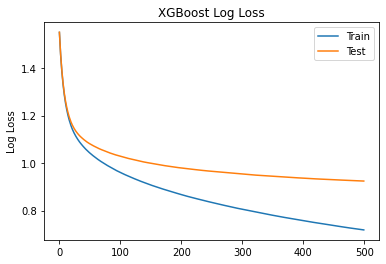

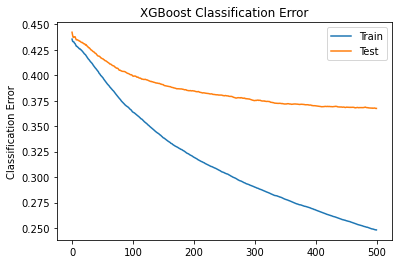

In [79]:
# print("Accuracy on testing set = ", accuracy_score(Y_test, predictions))
# print("RMSE on testing set = ", mean_squared_error(Y_test, predictions))

# make predictions for test data
y_pred = model.predict(Tfidf_word_vectors_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig1, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig2, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
# submission
# process submission set
submissionSet_vectors = processTest_raw(submissionSet,TfidfVec)
y_pred = model.predict(submissionSet_vectors)
predictions = [round(value) for value in y_pred]
submission_predict = submissionSet
submission_predict['Score'] = predictions
submission_predict['Score'] = submission_predict['Score'] + 1
print(submission_predict.head)
submission_output = submission_predict[['Id','Score']]
submission_output.to_csv("./gridSearch_2.csv",index = False)

## - Knn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix

# load data
trainingSet = pd.read_csv("./X_train.csv")
submissionSet = pd.read_csv("./X_test.csv").drop(['Score'], axis=1)
# split 
training_drop = trainingSet.dropna()
training_drop['Score'] = (training_drop['Score']-1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    training_drop.drop(['Score'], axis=1),
    training_drop['Score'],
    test_size=1/4.0,
    random_state=0
)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# prepare 
def accuracy(pred, label):
    return sum(np.where(pred == label, 1, 0))/len(label)

# process data for X train and X test and submission

def processTrain_raw(df: pd.DataFrame):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    TfidfVec = TfidfVectorizer(lowercase=True,
                    ngram_range = (2,2), 
                    tokenizer = RegexpTokenizer(r'\w+').tokenize, 
                    min_df = 50, max_df = 0.7)
    TfidfTrans_vectors = TfidfVec.fit_transform(df["Text"])
    return TfidfVec, TfidfTrans_vectors
    
def processTest_raw(df: pd.DataFrame, TfidfVec):
    df = clean_dataframe(df = df ,col = "Text", drop_col = ['ProductId', 'UserId', 'Summary', 'Time']) 
    tfidf_vectors = TfidfVec.transform(df["Text"])
    return tfidf_vectors

TfidfVec, Tfidf_word_vectors_train = processTrain_raw(X_train)
Tfidf_word_vectors_test = processTest_raw(X_test,TfidfVec)


# Learn the model
model = KNeighborsClassifier(n_neighbors=13).fit(Tfidf_word_vectors_train, y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test_processed)
X_submission['Score'] = model.predict(X_submission_processed)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))


# Create the submission file
submission = X_submission[['Id', 'Score']]
submission.to_csv("./knn_submit.csv", index=False)

# Submission

In [ ]:
X_submission = pd.read_csv("/kaggle/working/X_test.csv")
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

X_submission['Score'] = model.predict(X_submission_processed)
submission = X_submission[['Id', 'Score']]
submission.to_csv("/kaggle/working/submission.csv", index=False)